In [49]:
import model_training

In [2]:
df = pd.read_csv('../data/Rich.csv')
df.head()

,Name,age,country,category,image,marital_status,Education,net_worth,Degree
0,Mary-Kate and Ashley Olsen,34.0,United states,actresses,https://static1.therichestimages.com/wordpress...,Single,Campbell Hall School and New York University,$500 Million,Graduate
1,Jennifer Aniston,52.0,United states,actresses,https://static2.therichestimages.com/wordpress...,Married (Justin Theroux),Fiorello H. LaGuardia High School,$300 Million,high school
2,Julia Roberts,53.0,United states,actresses,https://static3.therichestimages.com/wordpress...,Married (Daniel Moder),Smyrna's Campbell High School,$250 Million,high school
3,Julia Louis Dreyfus,60.0,United states,actresses,https://static2.therichestimages.com/wordpress...,Married (Brad Hall),"Holton-Arms School, Northwestern University",$250 Million,Graduate
4,Sasha Alexander,46.0,United states,actresses,https://static2.therichestimages.com/wordpress...,Married (Edoardo Ponti),University of Southern California's School of...,$215 Million,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1817 entries, 0 to 1816
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1817 non-null   object 
 1   age             1639 non-null   float64
 2   country         1462 non-null   object 
 3   category        1817 non-null   object 
 4   image           1817 non-null   object 
 5   marital_status  1635 non-null   object 
 6   Education       1269 non-null   object 
 7   net_worth       1817 non-null   object 
 8   Degree          1273 non-null   object 
dtypes: float64(1), object(8)
memory usage: 127.9+ KB


In [4]:
print('shape of the dataframe : {}'.format(df.shape))
old_row = df.shape[0]

shape of the dataframe : (1817, 9)


In [5]:
df.isnull().sum()

Name                0
age               178
country           355
category            0
image               0
marital_status    182
Education         548
net_worth           0
Degree            544
dtype: int64

In [6]:
df.describe()

,age
count,1639.000000
mean,55.837706
std,46.716776
min,23.000000
25%,41.000000
50%,53.000000
75%,67.000000
max,1824.000000


In [7]:
df.age.sort_values(ascending=False).head(100)

753     1824.0
862      174.0
440      114.0
1735     108.0
91       104.0
         ...  
134       83.0
136       83.0
452       83.0
138       83.0
185       82.0
Name: age, Length: 100, dtype: float64

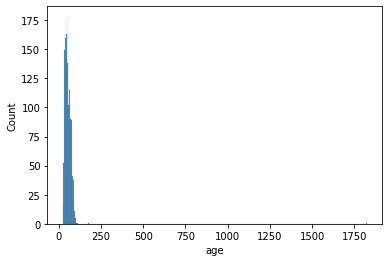

In [8]:
sns.histplot(df.age);

In [9]:
fig = px.box(df, x = 'age')
fig.show()

In [10]:
df[df.age.isnull()]

,Name,age,country,category,image,marital_status,Education,net_worth,Degree
150,Sean Connery,NaN,United kingdom,actors,https://static2.therichestimages.com/wordpress...,Married (Micheline Roquebrune),NaN,$350 Million,Graduate
159,Andrew Shue,NaN,NaN,actors,https://static3.therichestimages.com/wordpress...,NaN,NaN,$100 Million,NaN
401,Maria Franca Fissolo,NaN,Italy,businesswomen,https://static0.therichestimages.com/wordpress...,Widowed (Michele Ferrero),NaN,$33.4 Billion,NaN
410,Iris Fontbona,NaN,NaN,businesswomen,https://static1.therichestimages.com/wordpress...,Widowed (Andrónico Luksic Abaroa),NaN,$16 Billion,NaN
412,Birgit Rausing,NaN,NaN,businesswomen,https://static2.therichestimages.com/wordpress...,Widowed (Gad Rausing),NaN,$12.6 Billion,NaN
...,...,...,...,...,...,...,...,...,...
1793,Bruce Croxon,NaN,Canada,tv-personalities,https://static1.therichestimages.com/wordpress...,Married,NaN,$20 Million,NaN
1794,Aviva Drescher,NaN,United states,tv-personalities,https://static0.therichestimages.com/wordpress...,Married (Reid Drescher),"BA/Vassar College, MA/New York University, BNC...",$20 Million,Graduate
1798,Matt Nordgren,NaN,United states,tv-personalities,https://static2.therichestimages.com/wordpress...,Single,"University of Dallas, University of Texas",$20 Million,Graduate
1799,Star Jones,NaN,NaN,tv-personalities,https://static0.therichestimages.com/wordpress...,NaN,NaN,$18.5 Million,NaN


In [11]:
# filling the ages with the median value 
median_age = df.age.median()
for i in range(len(df)) : 
    if df.age.iloc[i] > 104 : 
        df.age.iloc[i] = median_age 

df.age.fillna(median_age, inplace= True)

In [12]:
splitted_name = df.Name.str.split(' ', expand = True )
splitted_name

,0,1,2,3,4,5,6,7,8
0,Mary-Kate,and,Ashley,Olsen,None,None,None,None,None
1,Jennifer,Aniston,None,None,None,None,None,None,None
2,Julia,Roberts,None,None,None,None,None,None,None
3,Julia,Louis,Dreyfus,None,None,None,None,None,None
4,Sasha,Alexander,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
1812,Chuck,Woolery,None,None,None,None,None,None,None
1813,Bill,Kurtis,None,None,None,None,None,None,None
1814,Lydia,Stirling,McLaughlin,None,None,None,None,None,None
1815,Richard,Rawlings,None,None,None,None,None,None,None


In [13]:
df['first_name'] = splitted_name[0]

In [14]:
gd = gender.Detector()
df['Gender'] = df['first_name'].apply(str.capitalize).map(lambda x: gd.get_gender(x))

In [15]:
df['Gender'].unique()

array(['unknown', 'female', 'mostly_male', 'mostly_female', 'male',
       'andy'], dtype=object)

In [16]:
df.Gender.replace(
    {
        'mostly_male': 'male', 
        'mostly_female': 'female', 
        'andy' : 'female', 
        'unknown' : 'others'
    }, inplace = True)

In [17]:
df.Gender.value_counts()

male      1189
female     416
others     212
Name: Gender, dtype: int64

In [18]:
df.country.unique()

array(['United states', 'United kingdom', 'France', 'Brazil',
       'South africa', nan, 'Spain', 'Italy', 'Australia', 'India',
       'Canada', 'New zealand', 'Japan', 'Germany', 'China',
       'Switzerland', 'Russia', 'Ireland', 'Belgium'], dtype=object)

In [19]:
df[df.country == 'United states'].Education.value_counts()

Syracuse University                            8
University of Southern California              7
Stanford University                            6
New York University                            5
Arizona State University                       5
                                              ..
Yale University, Wharton School of Business    1
Rice University and University of Houston      1
Osseo-Fairchild High School                    1
Dickinson College                              1
Eastern Hills High School                      1
Name: Education, Length: 676, dtype: int64

In [20]:
country_wise_college = {}

for country in df.country.dropna().unique() : 
    trimmed_df = df[df.country == country].dropna()
    country_wise_college[country] = {}

    for i in range(len(trimmed_df)) : 
        if trimmed_df.Education.iloc[i] not in country_wise_college[country].keys() : 
            country_wise_college[country][trimmed_df.Education.iloc[i]] = 1 
        else : 
            country_wise_college[country][trimmed_df.Education.iloc[i]] += 1 

country_wise_top_college = {}

for country in country_wise_college.keys() : 
    country_wise_top_college[country] = ''
    top_college, max_count = '', 0

    for college in country_wise_college[country].keys() : 
        if country_wise_college[country][college] > max_count : 
            max_count = country_wise_college[country][college]
            top_college = college 

    country_wise_top_college[country] = top_college
    
country_wise_top_college

{'United states': 'Syracuse University',
 'United kingdom': 'University College London',
 'France': 'Ecole Polytechnique (Bachelor of Arts & Science)',
 'Brazil': 'The University of Texas at Austin, Universidade Federal do Rio de Janeiro',
 'South africa': 'National School of the Arts',
 'Spain': "Spain's National Conservatory, Cristina Rota's New York School",
 'Italy': 'University of Perugia',
 'Australia': 'University of Melbourne',
 'India': 'BEc/Hansraj College, Jamia Millia Islamia',
 'Canada': 'McMaster University',
 'New zealand': 'Victoria University of Wellington',
 'Japan': 'Seiryo High School',
 'Germany': 'Hurtwood House school',
 'China': 'Shenzhen University',
 'Switzerland': 'University of St. Gallen ',
 'Russia': 'Kuibyshev Civil Engineering Institute',
 'Ireland': 'Imperial College London',
 'Belgium': ''}

In [21]:
for i in range(len(df)) : 
    if df.Education.isnull()[i] and not df.country.isnull()[i]: 
        df.Education.iloc[i] = country_wise_top_college[df.country.iloc[i]]

In [22]:
education_to_country_map = {}

for i in range(len(df)) : 
    if not df.Education.isnull()[i] and df.Education.iloc[i] not in education_to_country_map.keys() : 
        education_to_country_map[df.Education.iloc[i]] = df.country.iloc[i] 
        
education_to_country_map

{'Campbell Hall School and New York University ': 'United states',
 'Fiorello H. LaGuardia High School': 'United states',
 "Smyrna's Campbell High School": 'United states',
 'Holton-Arms School, Northwestern University': 'United states',
 " University of Southern California's School of Cinema-Television": 'United states',
 'Miami Dade Community College, Royal Academy of Dramatic Art in London': 'United states',
 'Tracey Ullman - Italia Conti Academy and Allan McKeown - Beal Grammar school in Ilford': 'United kingdom',
 'Ecole Polytechnique (Bachelor of Arts & Science)': 'France',
 'Syracuse University': 'United states',
 'The University of Texas at Austin, Universidade Federal do Rio de Janeiro': 'Brazil',
 'Colegio Marymount': 'United states',
 'Heritage Elementary School and Options for Youth Charter Schools': 'United states',
 'Beverly Hills High School': 'United states',
 'Fairfax High School': 'United states',
 'Menomonee Falls High School ': 'United states',
 ' Institut Catholiqu

In [23]:
for i in range(len(df)) : 
    if df.country.isnull()[i] and not df.Education.isnull()[i] : 
        df.country.iloc[i] = education_to_country_map[df.Education.iloc[i]]

In [24]:
splitted_net_worth = df.net_worth.str.split(' ', expand = True)
splitted_net_worth

,0,1
0,$500,Million
1,$300,Million
2,$250,Million
3,$250,Million
4,$215,Million
...,...,...
1812,$15,Million
1813,$15,Million
1814,$15,Million
1815,$15,Million


In [25]:
splitted_net_worth[1].unique()

array(['Million', 'Billion'], dtype=object)

In [26]:
df.net_worth = [
    splitted_net_worth[0].iloc[i][1:] if splitted_net_worth[1].iloc[i] == 'Million' 
    else float(splitted_net_worth[0].iloc[i][1:])*1000 
    for i in range(len(splitted_net_worth[0]))
    ]
df.net_worth

0        500
1        300
2        250
3        250
4        215
        ... 
1812      15
1813      15
1814      15
1815      15
1816    14.5
Name: net_worth, Length: 1817, dtype: object

In [27]:
for unique_marital_status in df.marital_status.unique() : 
    print(unique_marital_status)

Single
Married (Justin Theroux)
Married (Daniel Moder)
Married (Brad Hall)
Married (Edoardo Ponti)
Divorced (Harry Glassman)
Tracey Ullman - Widowed (Allan McKeown)
Divorced (David Bailey)
nan
Married (Joe Manganiello)
Married (Liam Hemsworth)
Divorced (Brad Pitt)
Married Ashton Kutcher (m. 2005–2013), Bruce Willis (m. 1987–2000), Freddy Moore (m. 1980–1985)
Divorced (Billy Mack Hamilton)
Divorced (Romain Dauriac)
Married (Cooke Maroney)
Married (Will Kopelman)
Divorced (Jesse G. James)
Married (Kenneth Bowser)
Divorced (Ted Turner)
Married (Keith Urban)
Married (Michelle Rounds)
Divorced (Sam Mendes)
Married (Matthew Broderick)
Married (François-Henri Pinault)
Married (David E. Kelley)
Divorced (Ben Thomas)
Married (Jim Toth)
Married (Brad Allen)
Divorced (Mark Levinson)
Married (Mark Consuelos)
Divorce Filed (David Arquette)
Widower (Peter Shaw)
Divorced (James Cameron)
Married (James Keach)
Engaged (Olivier Martinez)
Married (Ashton Kutcher)
Divorced (Richard Hamlett)
Married (Chris

In [28]:
splitted_marital_status = df.marital_status.str.split(' ', expand = True )
splitted_marital_status[0].unique()

array(['Single', 'Married', 'Divorced', 'Tracey', nan, 'Divorce',
       'Widower', 'Engaged', 'In', 'Marrried', 'Widowed', 'Annulled',
       'Separated', 'Partner', 'married', 'divorced', 'Spouse:', 'Widow',
       'Iñigo', '', 'Marriage', 'Undisclosed', 'Not', 'Partner:',
       'undisclosed', 'Marko', 'Seperated', 'Seprated', 'Alicia',
       'SIngle', 'Nicole', 'Divoced', 'Spouse'], dtype=object)

In [29]:
splitted_marital_status[splitted_marital_status[0] == '']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
524,,Married,(Patsy,Perin,Dubash),None,None,None,None,None,None,None,None,None,None,None,None


In [30]:
splitted_marital_status[splitted_marital_status[0] == 'Not']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
672,Not,Married,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [31]:
splitted_marital_status[splitted_marital_status[0] == 'Nicole']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1487,Nicole,Smith,(m.,2004),None,None,None,None,None,None,None,None,None,None,None,None,None


In [32]:
splitted_marital_status[splitted_marital_status[0] == 'Iñigo']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
465,Iñigo,Zobel,-,Married,(Maricris,Cardenas-Zobel),and,Mercedes,Zobel,-,Married,(Joseph,R.,McMicking),None,None,None


In [33]:
splitted_marital_status[splitted_marital_status[0] == 'Annulled']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
83,Annulled,(Kenny,Chesney),None,None,None,None,None,None,None,None,None,None,None,None,None,None
1547,Annulled,(Renée,Zellweger),None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [34]:
single = ['single', 'Not', 'Undisclosed', 'undisclosed', 'SIngle', 'Single']
married = ['married', 'Marko', 'Tracey', 'Spouse:', 'Partner:', 'Engaged','Married', 'Marrried', 'Widower', 'Annulled', 'married', 'Spouse', 'Iñigo', 'Marriage', '', 'Widow', 'Widowed', 'Nicole', 'Alicia']
in_a_relationship = ['in', 'Partner', 'In']
divorced = ['divorced', 'Divorced', 'Divoced', 'Divorce', 'Seprated', 'Seperated', 'Separated']

df.marital_status = splitted_marital_status[0]

In [35]:
for i in range(len(df)) : 
    if not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in single : 
        df.marital_status.iloc[i] = 'single'
    elif not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in married : 
        df.marital_status.iloc[i] = 'married'
    if not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in in_a_relationship : 
        df.marital_status.iloc[i] = 'in a relationship'
    if not df.marital_status.isnull()[i] and df.marital_status.iloc[i] in divorced : 
        df.marital_status.iloc[i] = 'divorced'

In [36]:
df.marital_status.unique()

array(['single', 'married', 'divorced', nan, 'in a relationship'],
      dtype=object)

In [37]:
df.marital_status.value_counts()

married              1168
divorced              236
single                196
in a relationship      35
Name: marital_status, dtype: int64

In [38]:
df.marital_status.fillna('married', inplace= True)

In [42]:
degree = []
for i in range(len(df)) :
    try : 
        if 'College' in  df['Education'][i] : 
            degree.append('Graduate')
        elif 'University' in df['Education'][i] : 
            degree.append('Post Graduate')
        elif 'High School' in df['Education'][i] : 
            degree.append('high school')
        elif df['Education'][i] != np.nan : 
            degree.append('Graduate')
        else :
            degree.append('high school')
    except :
        degree.append(np.nan)
# degree
df['Degree'] = degree

In [44]:
df.Degree.fillna('high school', inplace= True)

In [46]:
df.country.fillna('Others', inplace = True)

In [47]:
df.isnull().sum()

Name                0
age                 0
country             0
category            0
image               0
marital_status      0
Education         197
net_worth           0
Degree              0
first_name          0
Gender              0
dtype: int64

In [48]:
root = '../data/'
df.to_csv(root + 'preprocessed_df.csv', encoding='utf-8', index= False)